In [1]:
import numpy as np
import pandas as pd
import nltk


In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
data=pd.read_csv("train.csv")
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
print("Hatred Labeled:",(data.label==1).sum(),"Non Hatred Labeled",(data.label==0).sum())

Hatred Labeled: 2242 Non Hatred Labeled 29720


In [5]:
hashtags=data['tweet'].str.extractall('#(?P<hashtag>[a-zA-Z0-9_]+)').reset_index().groupby('level_0').agg(lambda x: ' '.join(x.values))

In [6]:
hashtags

,hashtag
level_0,
0,run
1,lyft disapointed getthanked
3,model
4,motivation
5,allshowandnogo
...,...
31953,instagram shower water berlin berlincitygirl g...
31954,holiday
31955,ibiza bringiton mallorca holidays summer


In [7]:
data.loc[:,'hashtags']=hashtags['hashtag']

In [8]:
data['hashtags'].fillna('',inplace=True)

In [9]:
data.loc[:,'mentions']=data['tweet'].str.count('@[a-zA-Z0-9_]+')

In [10]:
data.tweet=data.tweet.str.replace('@[a-zA-Z0-9_]+','')

In [11]:
data.tweet=data.tweet.str.replace('[^a-zA-Z]',' ')

In [12]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag,FreqDist,word_tokenize
stemmer= SnowballStemmer('english')
lemmer=WordNetLemmatizer()
part= {
    'N':'n',
    'V':'v',
    'J':'a',
    'S':'s',
    'R':'r'
}

def convert_tag(penn_tag):
    if penn_tag in part.keys():
        return part(penn_tag)
    else:
        return 'n'

def tag_and_lem(element):
    sent=pos_tag(word_tokenize(element))
    return ' '.join([lemmer.lemmatize(sent[k][0], convert_tag(sent[k][1][0])) for k in range(len(sent))])

data['tweet']=data['tweet']
data['hashtags']=data['hashtags'].apply(lambda x:' '.join([stemmer.stem(word) for word in x.split()]))

In [13]:
all_hashtags=FreqDist(list(' '.join(data.hashtags.values).split())).most_common(10)

In [14]:
hastred_hashtags=FreqDist(list(' '.join(data[data.label==1].hashtags.values).split())).most_common(10)

Text(0.5, 1.0, 'Hastred Hashtags in all tweets')

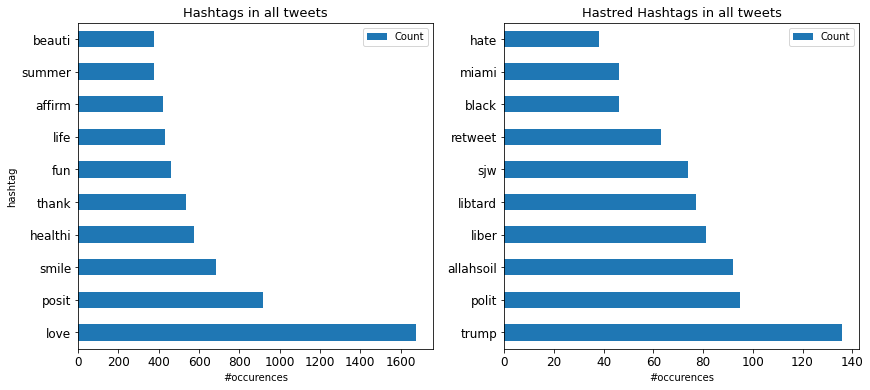

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
ax=plt.subplot(121)
pd.DataFrame(all_hashtags,columns=['hashtag','Count']).set_index('hashtag').plot.barh(ax=ax,fontsize=12)
plt.xlabel('#occurences')
plt.title("Hashtags in all tweets", size=13)
ax=plt.subplot(122)
pd.DataFrame(hastred_hashtags,columns=['hashtag','Count']).set_index('hashtag').plot.barh(ax=ax,fontsize=12)
plt.xlabel('#occurences')
plt.ylabel('')
plt.title("Hastred Hashtags in all tweets",size=13)

In [16]:
print("Number of mentions: {}\n No. of tweets having a mention: {} \n Correlation with label {}".format(data.mentions.sum(),len(data[data.mentions>0]),np.corrcoef(data.mentions,data.label)[0][1]))

Number of mentions: 17571
 No. of tweets having a mention: 11126 
 Correlation with label 0.07851491623991771


In [17]:
data.drop('mentions',axis=1,inplace=True)
data

,id,label,tweet,hashtags
0,1,0,when a father is dysfunctional and is so sel...,run
1,2,0,thanks for lyft credit i can t use cause th...,lyft disapoint getthank
2,3,0,bihday your majesty,
3,4,0,model i love u take with u all the time in ...,model
4,5,0,factsguide society now motivation,motiv
...,...,...,...,...
31957,31958,0,ate isz that youuu ...,
31958,31959,0,to see nina turner on the airwaves trying to...,shame imwithh
31959,31960,0,listening to sad songs on a monday morning otw...,
31960,31961,1,sikh temple vandalised in in calgary wso...,sikh templ calgari wso


In [18]:
data

,id,label,tweet,hashtags
0,1,0,when a father is dysfunctional and is so sel...,run
1,2,0,thanks for lyft credit i can t use cause th...,lyft disapoint getthank
2,3,0,bihday your majesty,
3,4,0,model i love u take with u all the time in ...,model
4,5,0,factsguide society now motivation,motiv
...,...,...,...,...
31957,31958,0,ate isz that youuu ...,
31958,31959,0,to see nina turner on the airwaves trying to...,shame imwithh
31959,31960,0,listening to sad songs on a monday morning otw...,
31960,31961,1,sikh temple vandalised in in calgary wso...,sikh templ calgari wso


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
vectorizer=TfidfVectorizer(stopwords.words('english'),ngram_range=(1,3),min_df=10)
features=vectorizer.fit_transform(data.tweet)

C:\Users\MadhuMurali\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass input=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',

In [20]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score
X_train,X_test,y_train,y_test=train_test_split(features,data.label)

Best parameters found were {'C': 30, 'penalty': 'l2'} with F1 score of 0.63


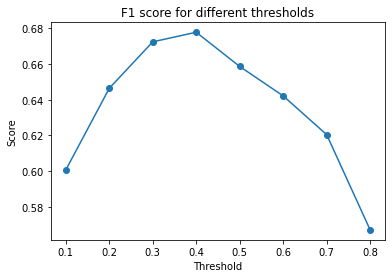

In [21]:
params = {'penalty': ['l1', 'l2'], 'C': [3, 10, 30, 100, 300]}
lrmodel =GridSearchCV(LogisticRegression(solver='liblinear', max_iter=150), param_grid=params, scoring='f1', cv=5, n_jobs=-1)
lrmodel.fit(X_train, y_train)
print("Best parameters found were {} with F1 score of {:.2f}".format(
    lrmodel.best_params_,
    lrmodel.best_score_
))
probas = lrmodel.predict_proba(X_test)
thresholds = np.arange(0.1, 0.9, 0.1)
scores = [f1_score(y_test, (probas[:, 1] >= x).astype(int)) for x in thresholds]
plt.plot(thresholds, scores, 'o-')
plt.title("F1 score for different thresholds")
plt.ylabel("Score")
plt.xlabel("Threshold")
plt.show()

In [22]:
params = {'C': [1000, 3000, 9000, 15000]}
svc = GridSearchCV(SVC(kernel='rbf', gamma='auto'), param_grid=params, scoring='f1', cv=3, n_jobs=-1)
svc.fit(X_train, y_train)
print("Best parameters found were {} with F1 score of {:.2f}".format(
    svc.best_params_,
    svc.best_score_
))
predictions = svc.predict(X_test)
print("\nF1 test score for SVC: {:.2f}".format(f1_score(y_test, predictions)))

Best parameters found were {'C': 9000} with F1 score of 0.62

F1 test score for SVC: 0.66
